# Generate single field primary beam

[Colab Link](https://colab.research.google.com/github/casangi/astroviper/blob/main/docs/core_tutorials/imaging/imaging_utils/cube_single_field_primary_beam.ipynb)



This notebook domonstrates how to generate a primary beam image with provided some imaging parameters

---

## Assumptions/Current limitation


- Currently only support ALMA telescopes (ALMA 12m and ACA 7m)
- Only airy disk model with a blockage is supported
- Following parameters are used :
  * Effective dish diameter: ALMA 10.7m,  ACA 6.7m    
  * Blockage diameter: ALMA 0.75m, ACA 0.75m

---


## API

In [29]:
from astroviper.core.imaging.imaging_utils.make_primary_beam import cube_single_field_primary_beam

In [30]:
cube_single_field_primary_beam?

Signature:
cube_single_field_primary_beam(
    im_params,
    telescope,
    model='casa_airy_disk',
)
Docstring:
Generate a primary beam image for a single field in a measurement set.

Parameters:
im_params : dict
    Imaging parameters: must include
    'cell_size': angular size of a pixel 2d tuple (rad, rad),
    'image_size': int 2d tuple (nx, ny),
    'frequency_coords': list of frequencies in Hz,
    'polarization': list of Stokes parameters,
    'phase_center': phase reference center (RA, Dec) in radians,
    'time_coords': list of time coordinates in seconds.

telescope : str
    The name of the telescope (e.g., 'ALMA', 'ACA').

Returns:
pb_image : np.ndarray
    The generated primary beam image.
File:      ~/SWDevel/radps/viper/sandbox/astroviper/src/astroviper/core/imaging/imaging_utils/make_primary_beam.py
Type:      function

## Install AstroVIPER

Skip this cell if you don't want to install the latest version of AstroVIPER.

In [31]:
from importlib.metadata import version
import os

try:
    os.system("pip install --upgrade astroviper")

    import astroviper

    print("Using astroviper version", version("astroviper"))

except ImportError as exc:
    print(f"Could not import astroviper: {exc}")

Using astroviper version 0.0.30


## Install additional modules needed for this demo

In [32]:
from xradio.image import open_image, load_image
from toolviper.utils.data import download, update
import numpy as np

## Example 1
Generate ALMA (12m) primary beam and compare with the PB image made by CASA

### Download Data

In [33]:
update()
# 3c286 data?
#download(file="3c286_Band6_5chans_lsrk_robust_0.5_niter_99_casa.pb")

[2026-01-12 10:53:20,320]  WARNING    viperlog:  File exists: /Users/ttsutsum/miniforge3/envs/vipertest/lib/python3.12/site-packages/toolviper/utils/data/.cloudflare 
[2026-01-12 10:53:20,321]     INFO    viperlog:  Updating file metadata information ...  


Output()

In [34]:
from toolviper.utils.data import get_files
files = get_files()
print(files)

['ea25_cal_small_before_fixed.split.ms', 'kband_beamcut_small.ms', 'ea25_cal_small_after_fixed.split.ms', 'J1924-2914.ms.calibrated.split.SPW3', 'extract_holog_verification.json', 'holog_numerical_verification.json', 'locit-input-pha.cal', 'panel_cutoff_mask', 'heuristic_model', 'panel-input-data', 'AA2-Mid-sim_00000.ms', 'Antennae_M8.img.zarr', 'Antennae_North.cal.lsrk.ms', 'Antennae_North.cal.lsrk.split.ms', 'complex_valued_uv.im', 'demo_simulated.im', 'no_mask.im', 'small_lofar.ms', 'small_meerkat.ms', 'global_vlbi_gg084b_reduced.ms', 'VLBA_TL016B_split_lsrk.ms', 'ngEHT_E17A10.0.bin0000.source0000_split_lsrk.ms', 'venus_ephem_test.ms', 'sdimaging.ms', 'ALMA_uid___A002_X1003af4_X75a3.split.avg.ms', 'VLASS3.2.sb45755730.eb46170641.60480.16266136574.split.v6.ms', 'feather_sim_vla_c1_pI.im', 'feather_sim_sd_c1_pI.im', 'Antennae_fld1_casa_lsrk.ps.zarr', 'Antennae_fld1_topo.ps.zarr', 'Antennae_North.cal.lsrk.split.ps.zarr', 'Antennae_North.cal.lsrk.ps.zarr', 'feather_model_convolved', 'fe

In [35]:
# Load CASA pb image to be used for comparison
casapb_im = open_image(
        "3c286_Band6_5chans_lsrk_robust_0.5_niter_99.pb",
)
casapb_im

Successful readonly open of default-locked table 3c286_Band6_5chans_lsrk_robust_0.5_niter_99.pb: 1 columns, 1 rows


<xarray.Dataset> Size: 7MB
Dimensions:            (time: 1, frequency: 5, polarization: 4, l: 250, m: 250)
Coordinates:
  * time               (time) float64 8B 5.684e+04
  * frequency          (frequency) float64 40B 2.398e+11 2.399e+11 ... 2.403e+11
  * polarization       (polarization) <U1 16B 'I' 'Q' 'U' 'V'
    velocity           (frequency) float64 40B 2.216e+05 6.54e+04 ... -4.03e+05
  * l                  (l) float64 2kB 6.06e-05 6.012e-05 ... -6.012e-05
  * m                  (m) float64 2kB -6.06e-05 -6.012e-05 ... 6.012e-05
    right_ascension    (l, m) float64 500kB 3.539 3.539 3.539 ... 3.539 3.539
    declination        (l, m) float64 500kB 0.5324 0.5324 ... 0.5325 0.5325
Data variables:
    PRIMARY_BEAM       (time, frequency, polarization, l, m) float32 5MB dask.array<chunksize=(1, 5, 4, 250, 250), meta=np.ndarray>
    MASK_PRIMARY_BEAM  (time, frequency, polarization, l, m) bool 1MB dask.array<chunksize=(1, 5, 4, 250, 250), meta=np.ndarray>
Attributes:
    coordinate_system_info:  {'reference_direction': {'attrs': {'frame': 'fk5...
    type:                    image
    data_groups:             {'base': {'mask_primary_beam': 'MASK_PRIMARY_BEA...

### Construct imaging parameters based on the CASA PB image

In [36]:
# Extract some image parameters 
phase_center = casapb_im.attrs['coordinate_system_info']['reference_direction']['data']
image_shape = casapb_im.PRIMARY_BEAM.shape
cell_size = [(casapb_im.l[1]-casapb_im.l[0]).values.item(), (casapb_im.m[1]-casapb_im.m[0]).values.item()]
frequency_coords = casapb_im.frequency.values.tolist()
polarization_coords = casapb_im.polarization.values.tolist()
time_coords = casapb_im.time.values.tolist()

In [37]:
# Store in imaging parameter dictionary 
im_params={}
 
im_params['image_size'] = image_shape[-2:]
im_params['cell_size'] = cell_size
im_params['image_center'] = np.array([int(im_params['image_size'][0]/2), int(im_params['image_size'][1]/2)])
im_params['phase_center'] = phase_center
im_params['frequency_coords'] = frequency_coords
im_params['polarization'] = polarization_coords
im_params['time_coords'] = time_coords

### Generate PB image

In [38]:
pb_image = cube_single_field_primary_beam(im_params, telescope='ALMA')

casa_airy_disk_rorder: image_size= (250, 250)
casa_airy_disk_rorder: image_center= [125 125]
casa_airy_disk_rorder: freq_chan= [2.39822637e+11 2.39947642e+11 2.40072647e+11 2.40197652e+11
 2.40322658e+11]
pb_image.dims= ('time', 'frequency', 'polarization', 'l', 'm', 'beam_params_label')
pb_image.sizes.values= ValuesView(Frozen({'time': 1, 'frequency': 5, 'polarization': 4, 'l': 250, 'm': 250, 'beam_params_label': 3}))
pb_image.coords= Coordinates:
  * time               (time) float64 8B 5.684e+04
  * frequency          (frequency) float64 40B 2.398e+11 2.399e+11 ... 2.403e+11
    velocity           (frequency) float64 40B 3.122e+05 ... -3.122e+05
  * polarization       (polarization) <U1 16B 'I' 'Q' 'U' 'V'
  * l                  (l) float64 2kB 6.06e-05 6.012e-05 ... -6.012e-05
  * m                  (m) float64 2kB -6.06e-05 -6.012e-05 ... 6.012e-05
    right_ascension    (l, m) float64 500kB 3.539 3.539 3.539 ... 3.539 3.539
    declination        (l, m) float64 500kB 0.5324 0.532

In [39]:
# select single timestamp, polarization, frequency
data_sel = {"time": [0], "polarization": [0], "frequency": [4]}

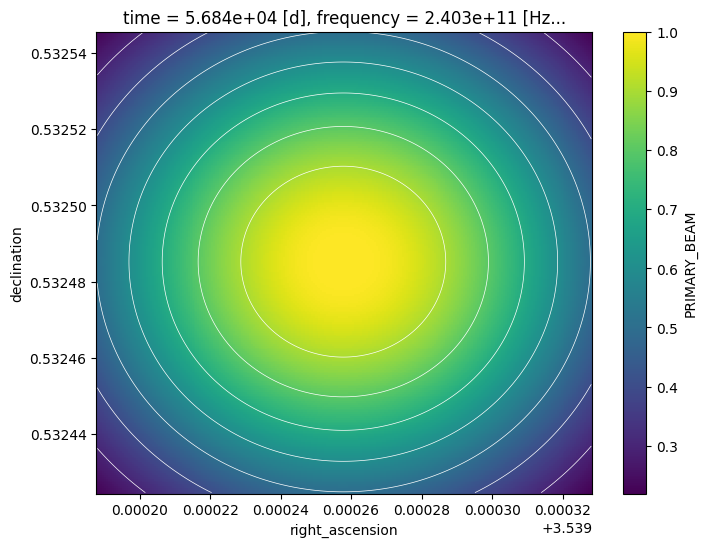

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
im = pb_image["PRIMARY_BEAM"].isel(data_sel).squeeze().plot.pcolormesh(x='right_ascension', y='declination')
ct = pb_image["PRIMARY_BEAM"].isel(data_sel).squeeze().plot.contour(levels=10, colors='white', linewidths=0.5, x='right_ascension', y='declination')
plt.show()

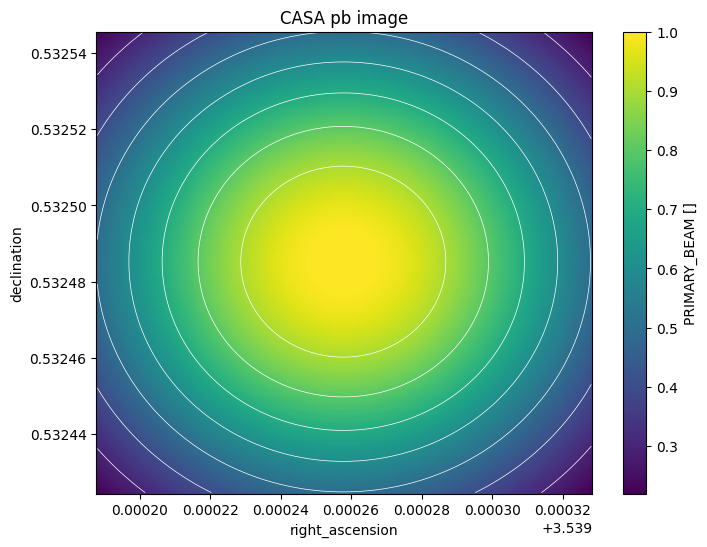

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))


im = casapb_im["PRIMARY_BEAM"].isel(data_sel).squeeze().plot.pcolormesh(x='right_ascension', y='declination')
ct = casapb_im["PRIMARY_BEAM"].isel(data_sel).squeeze().plot.contour(levels=10, colors='white', linewidths=0.5, x='right_ascension', y='declination')
plt.title('CASA pb image')
plt.show()

In [42]:
diff_ch0_im = pb_image["PRIMARY_BEAM"].isel(data_sel).data.squeeze() - casapb_im["PRIMARY_BEAM"].isel(data_sel).data.squeeze()


In [43]:
rel_diff = abs(diff_ch0_im.compute())/casapb_im["PRIMARY_BEAM"].isel(data_sel).data.squeeze().compute()

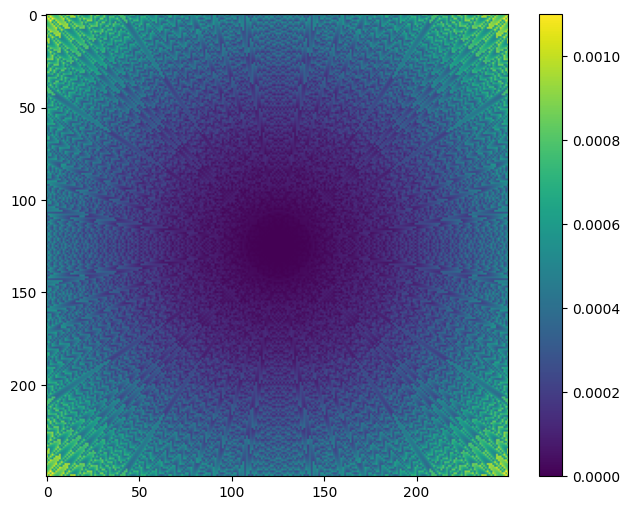

In [44]:
plt.figure(figsize=(8,6))
plt.imshow(rel_diff)
plt.colorbar()

(array([10781., 13716., 14276., 10612.,  7292.,  3166.,  1557.,   772.,
          272.,    56.]),
 array([0.        , 0.00010996, 0.00021992, 0.00032988, 0.00043984,
        0.0005498 , 0.00065976, 0.00076972, 0.00087968, 0.00098964,
        0.0010996 ]),
 <BarContainer object of 10 artists>)

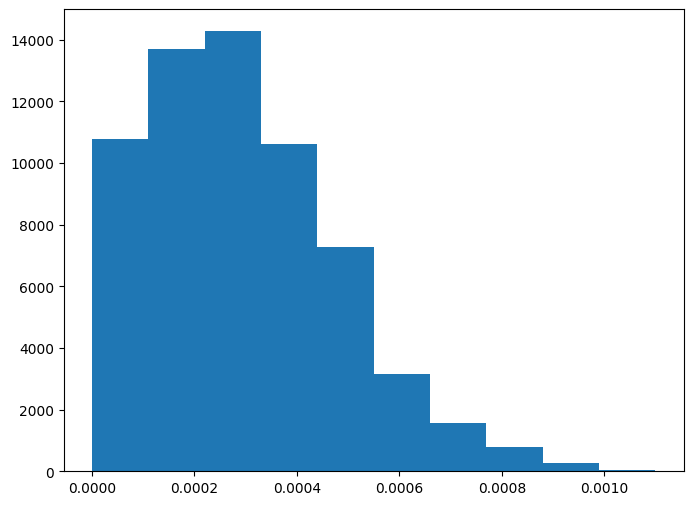

In [45]:
plt.figure(figsize=(8,6))
flatten_data = rel_diff.ravel()
plt.hist(flatten_data)

### Airy disk model based on the formula from the wikipedia 

In [46]:
pb_image2 = cube_single_field_primary_beam(im_params, telescope='ALMA', model='airy_model')

pb_image.dims= ('time', 'frequency', 'polarization', 'l', 'm', 'beam_params_label')
pb_image.sizes.values= ValuesView(Frozen({'time': 1, 'frequency': 5, 'polarization': 4, 'l': 250, 'm': 250, 'beam_params_label': 3}))
pb_image.coords= Coordinates:
  * time               (time) float64 8B 5.684e+04
  * frequency          (frequency) float64 40B 2.398e+11 2.399e+11 ... 2.403e+11
    velocity           (frequency) float64 40B 3.122e+05 ... -3.122e+05
  * polarization       (polarization) <U1 16B 'I' 'Q' 'U' 'V'
  * l                  (l) float64 2kB 6.06e-05 6.012e-05 ... -6.012e-05
  * m                  (m) float64 2kB -6.06e-05 -6.012e-05 ... 6.012e-05
    right_ascension    (l, m) float64 500kB 3.539 3.539 3.539 ... 3.539 3.539
    declination        (l, m) float64 500kB 0.5324 0.5324 ... 0.5325 0.5325
  * beam_params_label  (beam_params_label) <U5 60B 'major' 'minor' 'pa'
new_dims here = ('time', 'frequency', 'polarization', 'l', 'm')
coords here = Coordinates:
  * time             (

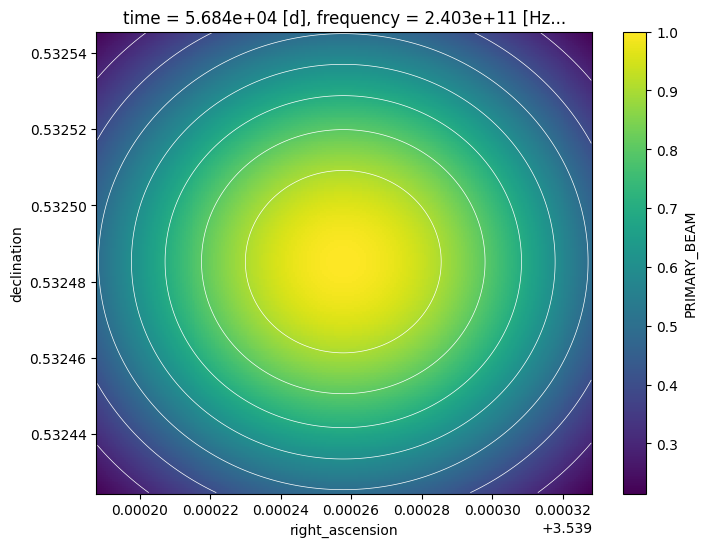

In [47]:
plt.figure(figsize=(8,6))
im = pb_image2["PRIMARY_BEAM"].isel(data_sel).squeeze().plot.pcolormesh(x='right_ascension', y='declination')
ct = pb_image2["PRIMARY_BEAM"].isel(data_sel).squeeze().plot.contour(levels=10, colors='white', linewidths=0.5, x='right_ascension', y='declination')
plt.show()

In [48]:
diff_ch0_im2 = pb_image2["PRIMARY_BEAM"].isel(data_sel).data.squeeze() - casapb_im["PRIMARY_BEAM"].isel(data_sel).data.squeeze()
rel_diff2 = abs(diff_ch0_im2.compute())/casapb_im["PRIMARY_BEAM"].isel(data_sel).data.squeeze().compute()

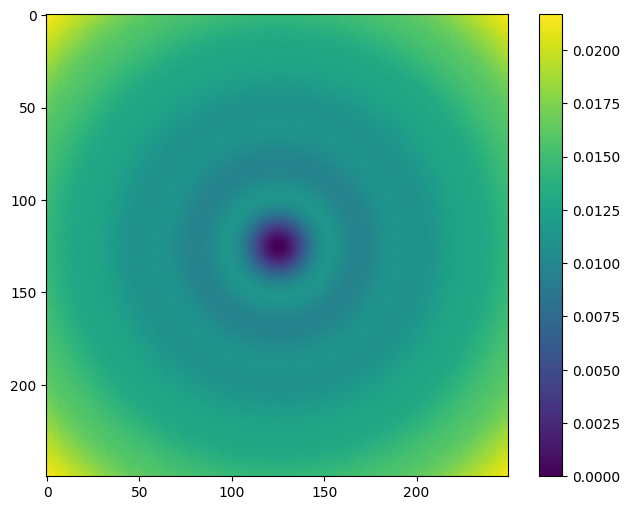

In [49]:
plt.figure(figsize=(8,6))
plt.imshow(rel_diff2)
plt.colorbar()

## Example 2

Generate ACA 7-m PB image


In [51]:
acapb_image = cube_single_field_primary_beam(im_params, telescope='ACA')

casa_airy_disk_rorder: image_size= (250, 250)
casa_airy_disk_rorder: image_center= [125 125]
casa_airy_disk_rorder: freq_chan= [2.39822637e+11 2.39947642e+11 2.40072647e+11 2.40197652e+11
 2.40322658e+11]
pb_image.dims= ('time', 'frequency', 'polarization', 'l', 'm', 'beam_params_label')
pb_image.sizes.values= ValuesView(Frozen({'time': 2, 'frequency': 5, 'polarization': 4, 'l': 250, 'm': 250, 'beam_params_label': 3}))
pb_image.coords= Coordinates:
  * time               (time) float64 16B 5.684e+04 5.684e+04
  * frequency          (frequency) float64 40B 2.398e+11 2.399e+11 ... 2.403e+11
    velocity           (frequency) float64 40B 3.122e+05 ... -3.122e+05
  * polarization       (polarization) <U1 16B 'I' 'Q' 'U' 'V'
  * l                  (l) float64 2kB 6.06e-05 6.012e-05 ... -6.012e-05
  * m                  (m) float64 2kB -6.06e-05 -6.012e-05 ... 6.012e-05
    right_ascension    (l, m) float64 500kB 3.539 3.539 3.539 ... 3.539 3.539
    declination        (l, m) float64 500kB 0

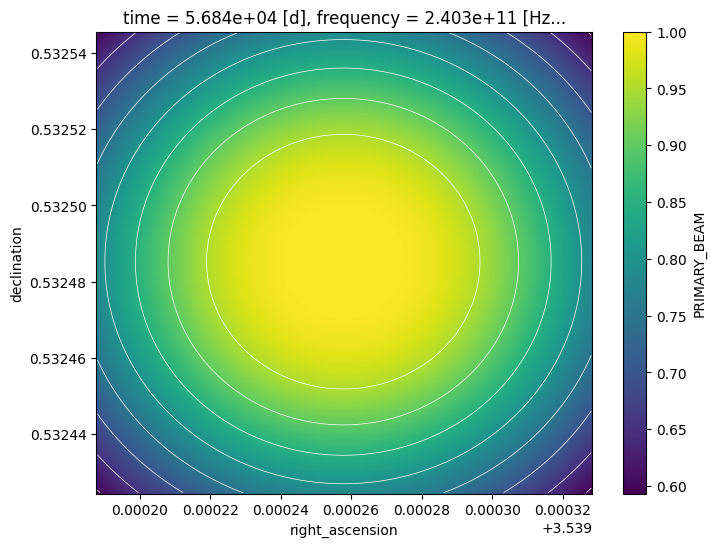

In [52]:
plt.figure(figsize=(8,6))
im = acapb_image["PRIMARY_BEAM"].isel(data_sel).squeeze().plot.pcolormesh(x='right_ascension', y='declination')
ct = acapb_image["PRIMARY_BEAM"].isel(data_sel).squeeze().plot.contour(levels=10, colors='white', linewidths=0.5, x='right_ascension', y='declination')
plt.show()